In [1]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras import initializers
import numpy as np
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Cargo Data

In [3]:
folder = 'DATA/'
x = np.load(folder+'train_images.npy')
y = np.loadtxt(folder+'train_labels.csv', delimiter=',', skiprows=1)
x_test = np.load(folder+'test_images.npy')

In [4]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.1)

In [9]:
y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_valid)

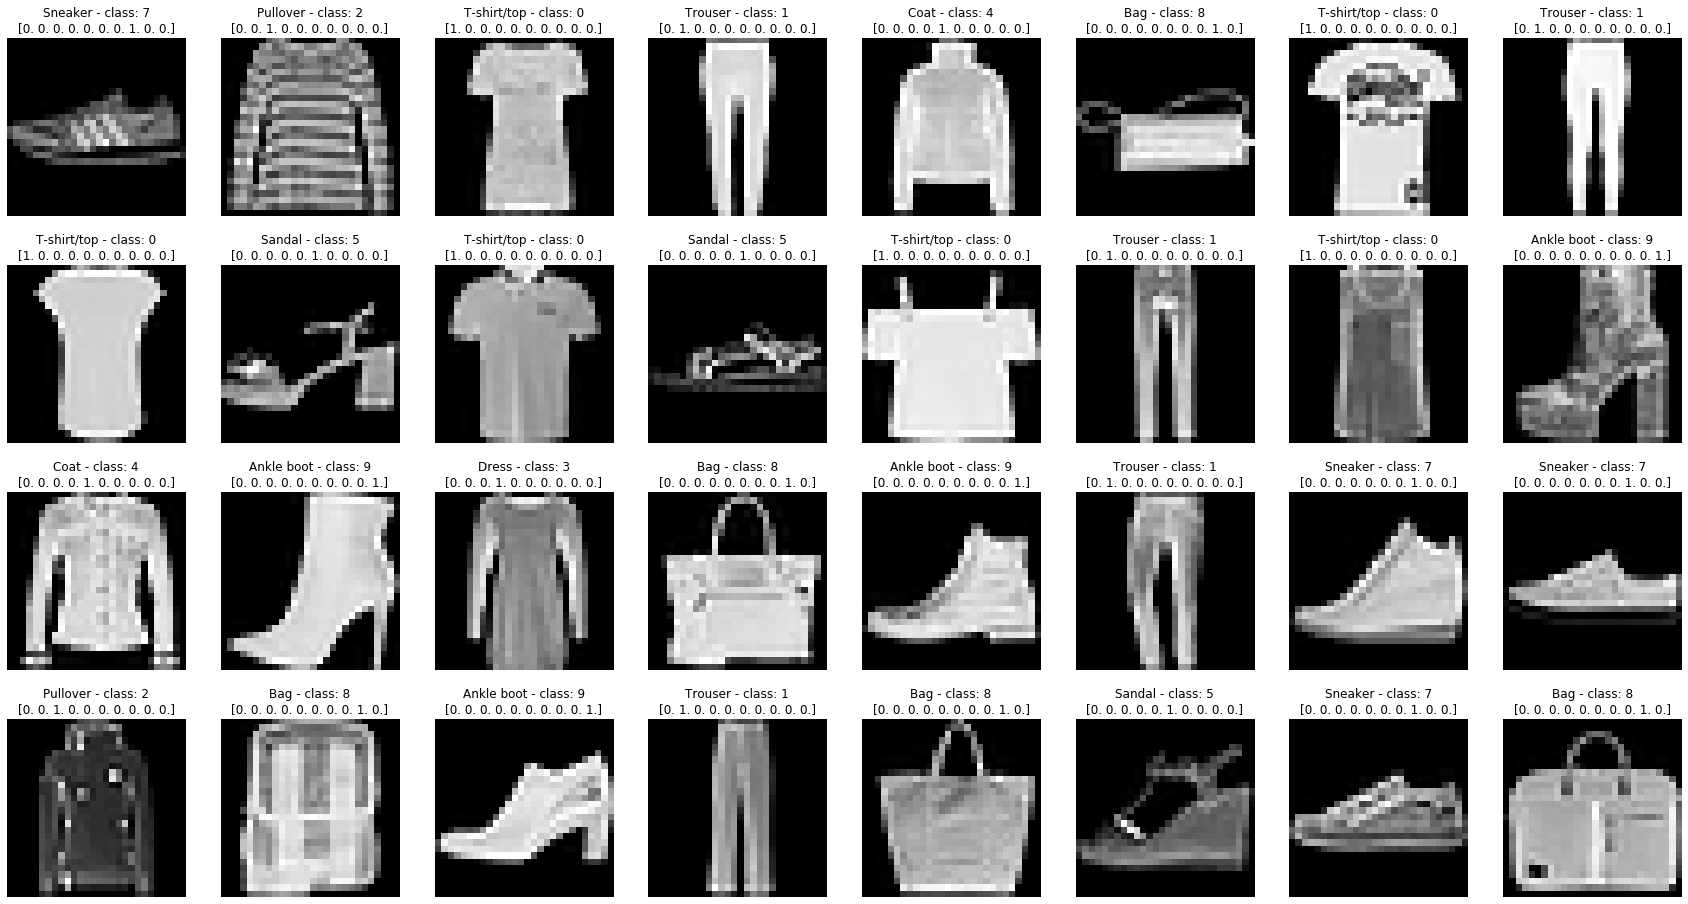

In [18]:
alto = 4
ancho = 8
f, axs = plt.subplots(alto, ancho, figsize=(30,4*alto))
axs = axs.reshape(-1)
for i in range(alto*ancho):
    axs[i].imshow(x_train[i], cmap='gray')
    axs[i].set_title(f'{classes[int(y_train[i])]} - class: {int(y_train[i])}\n{y_train_categorical[i]}')
    axs[i].axis('off')

In [19]:
output_size = 10

model_single_layer = Sequential()
model_single_layer.add(Flatten(input_shape=x_train.shape[1:]))
model_single_layer.add(Dense(output_size, name='Salida'))
model_single_layer.add(Activation('softmax'))
model_single_layer.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
Salida (Dense)               (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [20]:
lr = 0.000001 
SGD = optimizers.sgd(lr=lr)
model_single_layer.compile(loss = 'categorical_crossentropy', optimizer=SGD, metrics=['accuracy'])

In [21]:
batch_size = 512
model_single_layer.fit(x_train, 
                       y_train_categorical,
                       epochs=20, batch_size=batch_size, 
                       verbose=1, 
                       validation_data = (x_valid, y_val_categorical)
                      )

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 0s 8us/step - loss: 140.3325 - accuracy: 0.1631 - val_loss: 96.7720 - val_accuracy: 0.2178
Epoch 2/20
54000/54000 [==============================] - 0s 6us/step - loss: 83.9535 - accuracy: 0.2426 - val_loss: 73.4786 - val_accuracy: 0.2632
Epoch 3/20
54000/54000 [==============================] - 0s 6us/step - loss: 67.7633 - accuracy: 0.2763 - val_loss: 63.0619 - val_accuracy: 0.2932
Epoch 4/20
54000/54000 [==============================] - 0s 5us/step - loss: 60.7821 - accuracy: 0.3008 - val_loss: 58.3857 - val_accuracy: 0.3182
Epoch 5/20
54000/54000 [==============================] - 0s 6us/step - loss: 56.8163 - accuracy: 0.3223 - val_loss: 54.9949 - val_accuracy: 0.3385
Epoch 6/20
54000/54000 [==============================] - 0s 6us/step - loss: 53.6577 - accuracy: 0.3417 - val_loss: 52.1081 - val_accuracy: 0.3563
Epoch 7/20
54000/54000 [==============================] - 0s 6

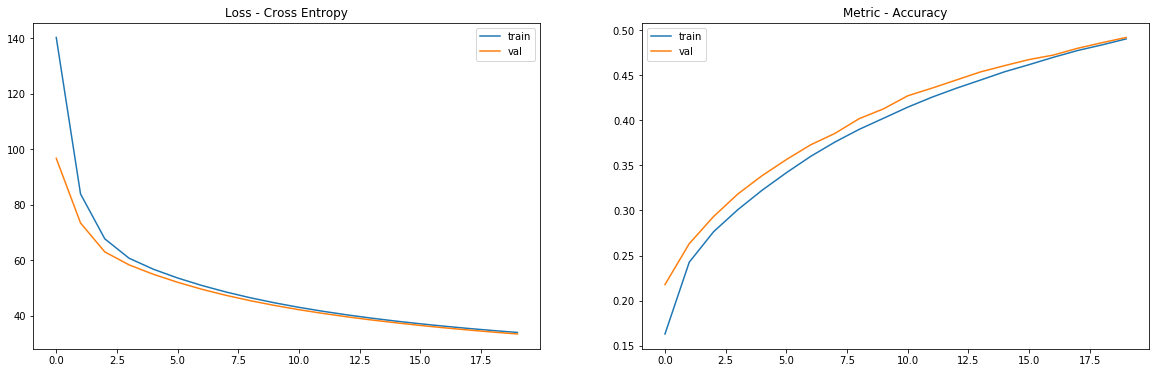

In [22]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
ax1.plot(model_single_layer.history.history['loss'], label='train')
ax1.plot(model_single_layer.history.history['val_loss'], label='val')
ax1.set_title('Loss - Cross Entropy')
ax1.legend()
ax2.plot(model_single_layer.history.history['accuracy'], label='train')
ax2.plot(model_single_layer.history.history['val_accuracy'], label='val')
ax2.set_title('Metric - Accuracy')
ax2.legend()
plt.show()

In [23]:
loss, acc = model_single_layer.evaluate(x_valid, y_val_categorical, verbose=0)
print(acc, loss)

0.49166667461395264 33.482767573038736


In [12]:
# Calculo probabilidades de cada clase para cada observación
test_prediction = model_single_layer.predict(x_test)
print(test_prediction.shape)

(10000, 10)


In [13]:
# Calculo clase
test_labels = np.argmax(test_prediction, axis = 1)
print(test_labels)

[0 2 5 ... 2 0 7]


# Armo CSV para submitear

In [14]:
import pandas
df = pandas.DataFrame(data={"Category": test_labels}).astype(int)
df.to_csv("./submission.csv", sep=',',index=True,  index_label='Id')